In [1]:
import pandas as pd
import time
df=pd.read_csv('./Airlines Reviews And Rating.csv')
df=df.drop("Users Reviews",axis=1)
df=df.fillna(6)
y=df.Recommended
df2=df.drop("Recommended",axis=1)
n=df2.select_dtypes(include='number')
c=df2.select_dtypes(exclude='number')
c=pd.get_dummies(c)
X=pd.concat([n,c],axis=1)
# X=n
X.head()

,Seat Comfort,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Aircraft Type_6,Aircraft Type_767-300,Aircraft Type_777,...,Date Flown_Sep-14,Date Flown_Sep-15,Date Flown_Sep-16,Date Flown_Sep-17,Date Flown_Sep-18,Date Flown_Sep-19,Date Flown_Sep-20,Date Flown_Sep-21,Date Flown_Sep-22,Date Flown_Sep-23
0,1.0,1.0,2.0,1.0,6.0,3.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.0,3.0,1.0,2.0,1.0,1.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,3.0,1.0,3.0,1.0,6.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1.0,1.0,1.0,1.0,1.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.0,2.0,1.0,3.0,1.0,3.0,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.8, random_state=42,stratify=y)

In [3]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

max_R2=0
p=[0,0]

all_R2=[]
t1=time.time()
for n_estimators in range(50,100,2):
    all_R2.append([])
    for max_depth in range(50,100,2):
        rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        rfc.fit(X_train,y_train)
        test_R2=rfc.score(X_test,y_test)
        all_R2[-1].append(test_R2)
        if test_R2>max_R2:
            max_R2=test_R2
            p=[n_estimators,max_depth]
t2=time.time()
print(max_R2,p)
print(all_R2)
print(t2-t1,"s")

0.939209726443769 [74, 92]
[[0.9270516717325228, 0.925531914893617, 0.9316109422492401, 0.9270516717325228, 0.9300911854103343, 0.9224924012158054, 0.9224924012158054, 0.925531914893617, 0.9270516717325228, 0.9300911854103343, 0.925531914893617, 0.9209726443768997, 0.9240121580547113, 0.9285714285714286, 0.9209726443768997, 0.9209726443768997, 0.9270516717325228, 0.925531914893617, 0.9316109422492401, 0.925531914893617, 0.9316109422492401, 0.925531914893617, 0.9270516717325228, 0.9240121580547113, 0.9209726443768997], [0.9361702127659575, 0.9209726443768997, 0.9240121580547113, 0.9270516717325228, 0.9316109422492401, 0.9316109422492401, 0.925531914893617, 0.9224924012158054, 0.9240121580547113, 0.9148936170212766, 0.9300911854103343, 0.9361702127659575, 0.9133738601823708, 0.925531914893617, 0.9179331306990881, 0.925531914893617, 0.9270516717325228, 0.9270516717325228, 0.9224924012158054, 0.9164133738601824, 0.9361702127659575, 0.9270516717325228, 0.9224924012158054, 0.9240121580547113

x_axis is max_depth, y_axis is n_estimator
0.939209726443769 [74, 92]


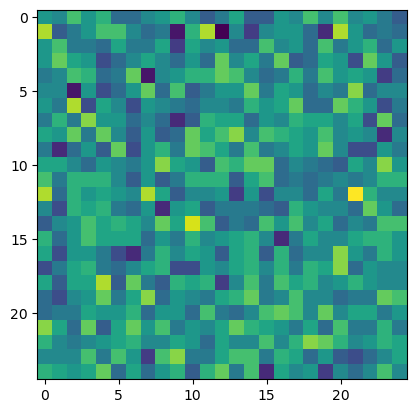

In [4]:
import matplotlib.pyplot as plt
plt.imshow(all_R2)
print("x_axis is max_depth, y_axis is n_estimator")
# print("n_estimator:",2,10,20,25,50,100)
# print("max_depth:",2,10,20,25,50,100)
print(max_R2,p)

In [5]:
#with smaller range
all_R2=[]
p0=50#p[0]
p1=100#p[1]
t1=time.time()
for n_estimators in range(p0-10,p0+11):
    if n_estimators<1:
        continue
    all_R2.append([])
    for max_depth in range(p1-10,p1+11):
        if max_depth<1:
            continue
        rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        rfc.fit(X_train,y_train)
        test_R2=rfc.score(X_test,y_test)
        all_R2[-1].append(test_R2)
        if test_R2>max_R2:
            max_R2=test_R2
            p=[n_estimators,max_depth]
            print(max_R2,p)
print(max_R2,p)
t2=time.time()
print(t2-t1,"s")

0.9407294832826748 [44, 100]
0.9407294832826748 [44, 100]
339.87484788894653 s


x_axis is max_depth, y_axis is n_estimator
n_estimator: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
max_depth: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
0.9407294832826748 [44, 100]


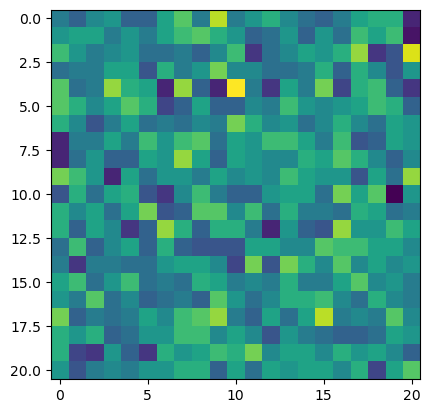

In [6]:
import matplotlib.pyplot as plt
plt.imshow(all_R2)
print("x_axis is max_depth, y_axis is n_estimator")
print("n_estimator:",[i for i in range(p0-10,p0+11)])
print("max_depth:",[i for i in range(p1-10,p1+11)])
print(max_R2,p)

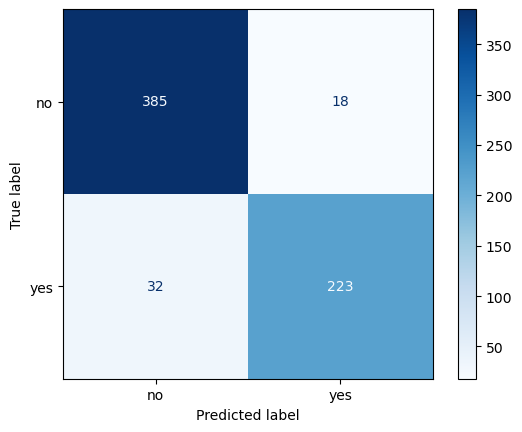

In [7]:
rfc = RandomForestClassifier(n_estimators=p[0], max_depth=p[1])
rfc.fit(X_train,y_train)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
        rfc,
        X_test,
        y_test,
        cmap=plt.cm.Blues)

In [8]:
predictions=rfc.predict(X_test)
df.iloc[X_test[predictions!=y_test].index]

,Aircraft Type,Country,Type_of_Travellers,Route,Seat_Types,Seat Comfort,Date Flown,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
2391,6,United Kingdom,Couple Leisure,EDI to LGW,Economy Class,4.0,Jan-16,4.0,1.0,4.0,6.0,6.0,4,no
1014,A321,United Kingdom,Solo Leisure,London to Athens,Economy Class,4.0,Oct-18,3.0,3.0,2.0,1.0,2.0,3,yes
2777,Boeing 747 400,South Africa,Couple Leisure,Cape Town to London,Economy Class,2.0,Jun-15,3.0,3.0,2.0,6.0,3.0,3,yes
3219,6,Canada,6,6,Economy Class,2.0,6,3.0,6.0,3.0,6.0,2.0,4,no
3051,6,United Kingdom,6,6,Economy Class,3.0,6,1.0,6.0,1.0,6.0,3.0,5,yes
2535,Boeing 777,United Kingdom,Couple Leisure,London to Luanda,Business Class,1.0,Nov-15,4.0,4.0,3.0,6.0,3.0,3,no
1505,A320,United States,Business,Athens to London Heathrow,Economy Class,3.0,Jul-17,2.0,3.0,1.0,6.0,1.0,3,yes
1894,Boeing 787-900,United States,Solo Leisure,LHR to AUS,Business Class,2.0,Dec-16,4.0,4.0,3.0,6.0,3.0,2,yes
1885,A320 / Boeing 767,United Kingdom,Business,LHR to EDI,Economy Class,4.0,Dec-16,3.0,4.0,1.0,6.0,6.0,3,yes
2095,Boeing 767,Australia,Solo Leisure,BCN to LHR,Economy Class,3.0,Aug-16,4.0,4.0,3.0,6.0,1.0,3,yes
